# Analysis of trajectories

@Liubov Tupikina 


Here we analyse trajectories:
1. we start with analysis of random trajectories (generated by stochastic system of equations)
2. we continue with analysis of real trajectories (from observations)

As an input we take the data in dataframe format:
dataframe(x(t), y(t)). Here we focus on two-dimensional trajectory, although analysis can be done for N-dimensional space.


### Main questions about trajectories
Each trajectory seems random and it is hard to compare one $X_1(t)$ to another $X_2(t)$. 
Primarily we are interested in properties of spatial and temporal properties of $X_i(t)$: 
1. distribution of duration of stops of human trajectories p(t)
2. distribution of length of jumps between two stops q(r)

These properties (distributions p(t) and q(r)) can help us to see if different people have different patterns in their trajectories $X_i(t)$ of distributions of duration of stops and lengths of stops.

### Analysis of real trajectories

In this project we are analyzing real trajectories, e.g. from the project, which we were part of http://inadilic.fr/data/ (credits to D.Grebenkov)

Text(0.5, 0.98, 'Distribution of steps for RW mu=0.5 sigma= 20')

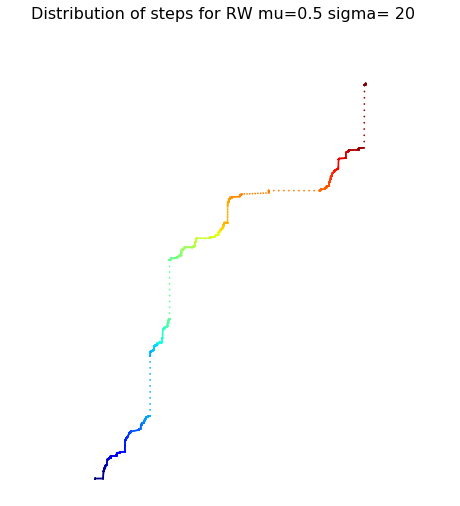

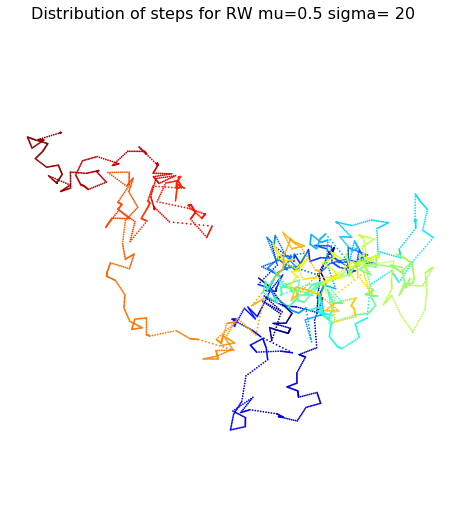

In [10]:
'''
We generate random trajectory of continuous time random walk (CTRW) in N-dimensional space. We take N=2, easier to visualize.
Alternatively we can also create or load dataframe with trajectories.

moves_dataframe = pd.DataFrame(data={
        'date': moves_processed_data['date'],
        'steps': moves_processed_data['steps'],
        'distance': moves_processed_data['distance'],
        'latitude': moves_processed_data['lat'],
        'longitude': moves_processed_data['lon']
})
#Plot distribution of moves from new dataframe.
#Compare moves from 1st trajectory and 2nd trajectory
sns.distplot(df1['distance'])
'''


import matplotlib.image as mpimg
import numpy as np
from itertools import cycle
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt


'''
Parameters of RW setting

'''
n= 500 #length of random walk
mu = 0.5 #normal distribution
sigma =20
beta = 5 #exponential parameters
a = 1 # pareto distribution
weib = 1 #weibul parameter

'''
Simple RW motion with random steps
'''

x = np.cumsum(np.random.randn(n))
y = np.cumsum(np.random.randn(n)) 

'''
Now we introduce some CTRW motion in between the steps driven from 
 Weibul distribution 
 Pareto distribution 
 Random normal distribution
'''

x =  np.cumsum(np.random.exponential(1./beta, n))
y =  np.cumsum(np.random.exponential(1./beta, n))

x_w = np.cumsum(np.random.weibull(weib, n))
y_w = np.cumsum(np.random.weibull(weib, n))

x =  np.cumsum(np.random.pareto(a, n))
y =  np.cumsum(np.random.pareto(a, n))

x_n =  np.cumsum(np.random.normal(mu, sigma, n))
y_n =  np.cumsum(np.random.normal(mu, sigma, n))


# We add 10 intermediary points between two
# successive points. We interpolate x and y.


'''
Now the trajectory is recorded in two arrays x2, y2
'''
k = 10
X_tr = np.interp(np.arange(n * k), np.arange(n) * k, x)
Y_tr = np.interp(np.arange(n * k), np.arange(n) * k, y)
#print('x2 rw', x2)


X_tr2 = np.interp(np.arange(n * k), np.arange(n) * k, x_n)
Y_tr2 = np.interp(np.arange(n * k), np.arange(n) * k, y_n)


'''
plotting one RW
'''

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(X_tr, Y_tr, c=range(n * k), linewidths=0,
           marker='o', s=3, cmap=plt.cm.jet,) # We draw our points with a gradient of colors.
ax.axis('equal')
ax.set_axis_off()
#fig.suptitle('Distribution of steps for RW a='+str(a), fontsize=16)
fig.suptitle('Distribution of steps for RW mu='+str(mu)+' sigma= '+str(sigma), fontsize=16)
#plt.savefig('RW_motion_steps_normal_mu'+str(mu)+'sigma'+str(mu)+'.png')


fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(X_tr2, Y_tr2, c=range(n * k), linewidths=0,
           marker='o', s=3, cmap=plt.cm.jet,) # We draw our points with a gradient of colors.
ax.axis('equal')
ax.set_axis_off()
#fig.suptitle('Distribution of steps for RW a='+str(a), fontsize=16)
fig.suptitle('Distribution of steps for RW mu='+str(mu)+' sigma= '+str(sigma), fontsize=16)
#plt.savefig('RW_motion_steps_normal_mu'+str(mu)+'sigma'+str(mu)+'.png')


## Load trajectories from real data

We first load real trajectories. 
We start with sample data from Brownian motion. 
Loading big csv files may take time.

In [13]:
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
import csv


# load data, it is very heavy 
print('loading the data')
file_name = "C:/Users/lyubo/Documents/DATA_networks/trajectories_data/BM_sample.txt"
traj = np.loadtxt(file_name) #, delimiter = ',')
print('data loaded in format ', type(traj),np.shape(traj))

shape = np.shape(traj)
size = shape[0]

# we can now save trajectory as dataframe for convenience 
# for 1D trajectory
df = pd.DataFrame({'Column1': traj[:]})

# for ND trajectory
#df =  pd.DataFrame({'Column1': traj[:,0], 'Column2': traj[:, 1]}


# we can also load trajectories from csv file
#traj = pd.read_csv('C:/Users/lyubo/Documents/DATA_networks/mobilitydata/bikes_sharing_data_technologiestiftung_berlin/pseudonomysed_raw.csv')
#traj.head()

loading the data
data loaded in format  <class 'numpy.ndarray'> (10000,)


## Displaying trajectories

Text(0.5, 0.98, 'Trajectory from real data')

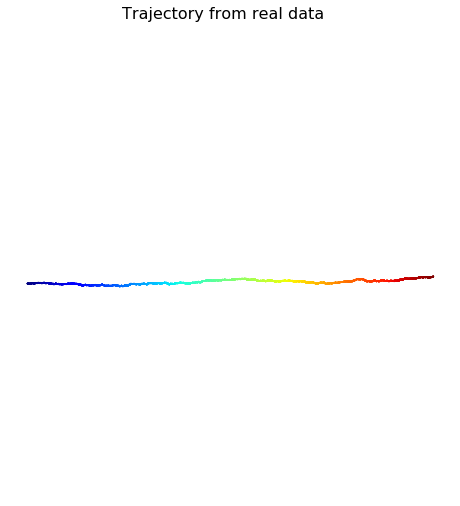

In [16]:
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
import csv

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
timeaxis =  np.linspace(start = 0, stop = size, num = size)
shape = np.shape(traj)
size = shape[0]
ax.scatter(timeaxis, traj, c=range(size), linewidths=0,marker='o', s=3, cmap=plt.cm.jet,) # We draw our points with a gradient of colors.
ax.axis('equal')
ax.set_axis_off()
#fig.suptitle('Distribution of steps for RW a='+str(a), fontsize=16)
fig.suptitle('Trajectory from real data', fontsize=16)


#  Analysis of real trajectories
Now we are ready to analyze our trajectory, encoded in two arrays (X_tr(t),Y_tr(t)). 
You can load your data in these files X_tr(t), Y_tr(t). 
We first do standard Continuous time rando walk analysis, then we come to more advanced analysis.


### Continuous time random walk. Definition and ideas.

*Continuous time random walk* (CTRW) is a generalization of a random walk where the wandering particle waits for a random time between jumps. 
It is a stochastic jump process with arbitrary distributions of jump lengths and waiting times.
More generally it can be seen to be a special case of a Markov renewal process. 

Important properties of CTRW are r(t) and d(t) distributions of lengths of jumps and durations correspondingly. 

For more details look at code and papers here 
https://github.com/Liyubov/networks_random_walking

### Analysis 

We use here several methods of analysis of trajectories using CTRW framework. 

1. Standard deviation. 
Given the input trajectory r(t) =(x(t),y(t)), we first estimate standard deviation for trajectory (STD), which is just the root of variance so var(τ)=(Var(r(t)-r(t-τ))), calculating it in Euclidean space.


2. 
One can also estimate Hurst exponent, which is used as a measure of long-term memory of time series
https://en.wikipedia.org/wiki/Hurst_exponent#Estimating_the_exponent.
Hurst exponent relates to the autocorrelations of the time series, and the rate at which these decrease as the lag between pairs of values increases. 
For any trajectory we can write Var(τ) ∝ τ^(2H), where H is the Hurst exponent.
Hence (Var(z(t)-z(t-τ))) ∝ τ^(2H). 
Then 
[log (Var(z(t)-z(t-τ))) / log τ ] / 2 ∝ H (gives the Hurst exponent) where we know the term in square brackets on far left is the slope of a log-log plot of tau and a corresponding set of variances.
*Range of Hurst exponent.*
A value H in the range 0.5–1 indicates a time series with long-term positive autocorrelation, meaning both that a high value in the series will probably be followed by another high value and that the values a long time into the future will also tend to be high. A value in the range 0 – 0.5 indicates a time series with long-term switching between high and low values in adjacent pairs, meaning that a single high value will probably be followed by a low value and that the value after that will tend to be high, with this tendency to switch between high and low values lasting a long time into the future. A value of H=0.5 can indicate a completely uncorrelated series.

Basically, the idea of Hurst exponent is to characterize trajectory in terms of self-repetition. If Hurst exponent is between [0,0.5], then it indicates that trajectory has switches between different regimes. 
While if Hurst exponent  [0.5, 1], then it means that there are less switches between long and short jumps and trajectory has long-term positive autocorrelation. If Hurst exponent is 0.5, then it indicates completely uncorrelated series (although it depends on scales). 




In [2]:

'''
We adapt the function to estimate:
1.  STD of trajectories;
2.  Hurst exponent for trajectories.

First we estimate STD 
Then we estimate Hurst exponent. 
'''


print("Calculating STD of trajectory ")  
data1 = list(zip(X_tr, Y_tr))#zip together x and y coordinates
data2 = list(zip(X_tr2, Y_tr2))
#data1 = np.asarray(latlon1) # if imported from dataframe
print("std of trajectory : ", np.std(data1)) 


lags = range(2,100)
def hurst_exponen_chan(p):
    '''
    given series p(t), where t is time 
    '''    
    variancetau = []; tau = []

    for lag in lags: 

        #  Write the different lags into a vector to compute a set of tau or lags
        tau.append(lag)

        # Compute the log returns on all days, then compute the variance on the difference in log returns
        # call this pp or the price difference
        pp = np.subtract(p[lag:], p[:-lag])
        variancetau.append(np.var(pp))

    # we now have a set of tau or lags and a corresponding set of variances.
    #print tau
    #print variancetau

    # plot the log of those variance against the log of tau and get the slope
    m = np.polyfit(np.log10(tau),np.log10(variancetau),1)

    hurst = m[0] / 2

    return hurst

print('hurtst exponent')
print(hurst_exponen_chan(data1))


Calculating STD of trajectory 
std of trajectory :  10704.7809952
hurtst exponent
0.633381525116


### Estimation of scaling exponent of trajectory 

Given trajectory displacements r(t) = t^(-b-1),  we estimate b constant from the trajectory. 
Then  we fit this distribution of travelling distances to a power law. 

If parameter b<2, then this indicates that trajectories are reminiscent of scale-free random walks known as Le´vy flights. If parameter b>2, this indicates that trajectory generating process is related to normal spreading.

For this we are using Python package for  analysis of diffusion data
https://diffusion-analysis-md-simulations.readthedocs.io/en/latest/diffusion_analysis.html

    *diffusion_analysis.fit_anomalous_diffusion_data(time_data_array, MSD_data_array, degrees_of_freedom=2)*
    
function should fit anomalous diffusion data to Equation 1 in [Kneller2011], and return appropriate diffusion parameters:    MSD=ND_αt^α.


In [6]:
'''
We adapt the function to estimate:
1.  STD of trajectories;
2.  beta exponent 
'''

import numpy as np 
#to prepare for diffusion analysis, load my github-hosted diffusion module:
import sys; sys.path.append('/sansom/sc2/bioc1009/github_projects/diffusion_utility/diffusion_analysis_MD_simulations')
#import diffusion_analysis


print("Calculating beta constant of first trajectory ")  

#load trajectory in 2D 
#data1 = np.asarray(latlon1)
print("std of trajectory : ", np.std(data1)) 

#diffusion_analysis.fit_anomalous_diffusion_data(time_data_array, MSD_data_array)


Calculating beta constant of first trajectory 
std of trajectory :  734.079518065


## Convex hull analysis of trajectories 

Given trajectory in 2D (in general in N dimensions) we can characterize some of its properties by the applying convex hull algorithms. 

### Example

Given random trajectory in N-dimensions 
<img src="convex.png" alt="Drawing" style="width: 200px;"/>
we draw the polygon around it, and estimate its volume, which allows us to characterize the trajectory qualitatively .


General information about convex hull
https://en.wikipedia.org/wiki/Convex_hull

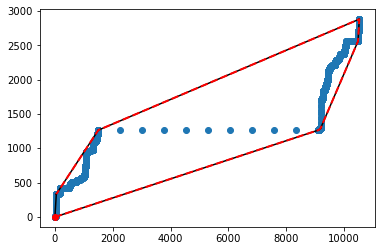

calculating area
Volume is 11401500.18
Area is 22621.88


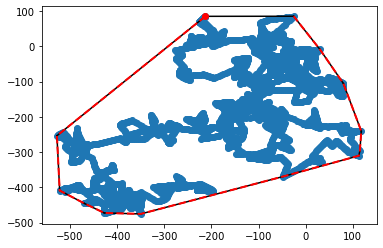

calculating area
Volume is 246290.59
Area is 1916.97


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os
#from RDP import rdp #import rdp
import networkx as nx
from scipy.spatial import ConvexHull


N = 10 # number of points  
M = 5 # dimensions

"""
LOADING input data:
# entries:  public_i pub_tag_i pub_time_i  
# public#i (Name and title encoded into number -> separate table) 
# tag of publication: there are finite number of tags (some of them are not corresponding to one field)
# time index is better to make in linear scale -> 1:365*y, where y is number of years)
"""

#data points should be data from trajectories of researchers
datarandom = np.random.rand(N,M) #generate N datapoints in M dimensions
#data = np.random.rand(30, 2)   # 30 random points in 2-D

#load trajectory from the file or from above
#data1 = np.asarray(latlon1) #give array, not the list
#data2 = np.asarray(latlon2) #get data from the second participant

                       
"""
function ALGORITHM convext hull
"""
         

def convex_hull(data):
              
    hull = ConvexHull(data)
    #print('data', data)

    plt.plot(data[:,0], data[:,1], 'o')
    for simplex in hull.simplices:
        plt.plot(data[simplex, 0], data[simplex, 1], 'k-')
    
    plt.plot(data[hull.vertices,0], data[hull.vertices,1], 'r--', lw=2)
    plt.plot(data[hull.vertices[0],0], data[hull.vertices[0],1], 'ro')
    plt.show()   
    """
    estimate the volume of the convex hull for trajectory in time frame
    """ 
    print('calculating area')
    points = np.array([[-1,-1, 1], [1, 1, 0], [-1, 1, 0], [1,-1, -1]])
    hull = ConvexHull(data)
    print("Volume is %2.2f" % hull.volume) # N-d object
    print("Area is %2.2f" % hull.area) # (N-1)-d object

    
'''
Now we apply convex hull to data to show how it works
We draw convex hull around trajectory
'''
convex_hull(np.asarray(data1))
#convex_hull(data2)
convex_hull(np.asarray(data2))
    

### Convex hull sliding window analysis of trajectories
We also analyze trajectory using sliding window analysis, where we measure the volume of convex hull $V(t,t+ \Delta t)$ for trajectory $Tr(t)=(X(t),Y(t))$ during the period of ($\Delta t$). 
To read more about convex hull algorithm applied to particle trajectories 
https://arxiv.org/pdf/1708.06517.pdf

making sliding window analysis...
steps  10000


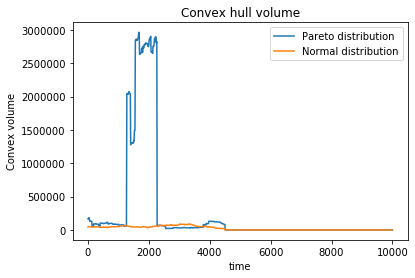

In [11]:


import matplotlib.pyplot as plt
import numpy as np
import os
#from RDP import rdp #import rdp
import networkx as nx
from scipy.spatial import ConvexHull


"""
we use the same data1 file as in cells above 
we specify parameters of convex hull analysis below
"""

#N = 10 # number of points for random trajectory, if it is used 
#M = 5 # dimensions of random trajectory
size_window = 1000 #sliding window should not be too small, otherwise it is not convex

                       
def convex_hull_window(data):
              
    hull = ConvexHull(data)

#    plt.plot(data[:,0], data[:,1], 'o')
#    for simplex in hull.simplices:
#        plt.plot(data[simplex, 0], data[simplex, 1], 'k-')   
#    plt.plot(data[hull.vertices,0], data[hull.vertices,1], 'r--', lw=2)
#    plt.plot(data[hull.vertices[0],0], data[hull.vertices[0],1], 'ro')
#    plt.show()   


    #points = np.array([[-1,-1, 1], [1, 1, 0], [-1, 1, 0], [1,-1, -1]])
    #hull = ConvexHull(data)
    #print(hull.volume) # Volume of N-d object "Volume is %2.2f" % 
    #print("Area is %2.2f" % hull.area) # (N-1)-d object
    return hull.volume


def convex_hull_sliding_window(data, steps, size_window):
    '''
    data - trajectory
    steps - number of time steps in trajectory 
    size_window - time size of the sliding window
    '''

    volume_array = np.zeros(steps)
    
    for itime in range(0, int((steps-size_window)/2)): #steps-1):
        #print(itime)
        time_max = (itime +size_window)%(steps+1) #calculate maximum time for sliding window
        data_i = data[itime: time_max] #cut data_i  from origianal data by cutting trajectory 
        volume_array[itime] = convex_hull_window(data_i)#apply convex_hull function
        #make exception for non-convex areas
    return volume_array

'''
Apply sliding window analysis to example trajectory
'''


print('making sliding window analysis...')
steps = np.size(data1) 
print('steps ', steps)

conv_array1 = convex_hull_sliding_window(np.asarray(data1), steps, size_window)

conv_array2 = convex_hull_sliding_window(np.asarray(data2), steps, size_window)


#np.savetxt('convex_array.out', conv_array)#, delimiter=',') 
plt.plot(conv_array1)
plt.plot(conv_array2)
plt.title("Convex hull volume")
plt.xlabel("time")
plt.ylabel("Convex volume")
plt.legend(['Pareto distribution', 'Normal distribution']) #plt.legend(["Time window size"])
plt.show()


# Plot is not perfect, need to cut the tail of the curve

### Observations
As you can see convex hull analysis allows to give quantitative characteristics of the trajectory in time. 
This sliding window analysis however depends on the size of the window. Therefore we need some other complementary characteristics for measures the long-term trends of trajectories.

### Scaling analysis 

We can show here that many trajectories behaviour can be described mathematically on many spatio-temporal scales by a two-parameter continuous-time random walk model (CTRW).

In [5]:
import numpy as np

#here we calculate MSD for our trajectory

r = np.sqrt(X_tr**2 + Y_tr**2)
diff = np.diff(r) #this calculates r(t + dt) - r(t)
diff_sq = diff**2
MSD = np.mean(diff_sq)

print(MSD)

2.00443885195


Plotting $P(\Delta r)$ of trajectories suggests that  motion follows a truncated
Levy flights: 
\begin{equation}
P(\Delta r = (\Delta r + \Delta r_0 )^{-\beta} exp(-\Delta r/k), 
\end{equation}
where $\beta$ is exponent of Levy flight. 

However, the observed shape of $P(\Delta r)$ could be explained
by three distinct hypotheses: first, each individual follows a Levy trajectory with jump size distribution given by equation (1) (hypothesis A); second, the observed distribution captures a population-based heterogeneity, corresponding to the inherent differences between individuals (hypothesis B); and third, a population-based heterogeneity coexists with individual Levy trajectories (hypothesis C); hence, equation (1) represents a convolution of hypotheses A and B. 


<class 'numpy.ndarray'>


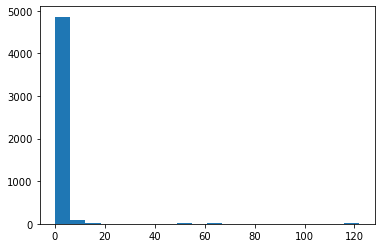

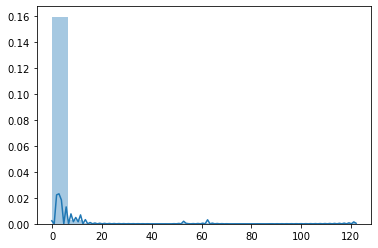

In [3]:
### First we calculate the distribution P(\delta) of jumps
import numpy as np
import seaborn




def calc_jump_dist(Xarray,Yarray): #function to calculate distribution of steps
   # given arrays Xarray, Yarray of trajectories
    dist = np.zeros(len(Xarray))
    for i in range(0, len(Xarray)-1):
        dist[i] = calc_dist(Xarray[i],Xarray[i+1],Yarray[i],Yarray[i+1])
    return dist
    
    
    
def calc_dist(x1,x2,y1,y2): #function to calculate distance between 2 points in 2D
    return np.sqrt((x1-x2)*(x1-x2)+(y1-y2)*(y1-y2))


# make sure that we get the right type of the data
print(type(X_tr))

# now we apply this function to routes dataframe
jumps_lengths = calc_jump_dist(X_tr,Y_tr)



# now we are plotting the histogram 
plt.hist(jumps_lengths, bins=20)
ax.set_xscale('log')
plt.show()

seaborn.distplot(jumps_lengths, bins=20)
plt.show()

### Analysis of trajectories 

In order to analyze trajectories and verify the hypothesis about the data we need to make further calculations.


Plotting $P(\Delta r)$ of trajectories (plots to insert from above) suggests that  motion follows a truncated
Levy flights: 
\begin{equation}
P(\Delta r = (\Delta r + \Delta r_0 )^{-\beta} exp(-\Delta r/k), 
\end{equation}
where $\beta$ is exponent of Levy flight. 

However, the observed shape of $P(\Delta r)$ could be explained
by three distinct hypotheses: first, each individual follows a Levy trajectory with jump size distribution given by equation (1) (hypothesis A); second, the observed distribution captures a population-based heterogeneity, corresponding to the inherent differences between individuals (hypothesis B); and third, a population-based heterogeneity coexists with individual Levy trajectories (hypothesis C); hence, equation (1) represents a convolution of hypotheses A and B. 
\\
To distinguish between hypotheses A, B and C, we can use standard techniques [M.Gonzales, et al. 2008] the radius of gyration for each individual, or using convex hull analysis [\url{ https://github.com/Liyubov/random_walks_and_networks/blob/master/analysis_of_trajectories.ipynb}].

Formula for gyration radius:

$r^a_g(t) = \sqrt{1/n^a_c(t) \sum (r^a_i-r^a_c)^2} $,

where $r^a_i$ represents the $i = 1, ..., n^a_c(t)$ positions recorded for a particle, $r^a_c$ is the center of mass of the trajectory.

C:\Users\lyubo\Anaconda3\envs\default\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in double_scalars
No handles with labels found to put in legend.


5000
centre of masses [ 9.75313619  9.77594481]
radius gyration 2834.46452027
radius gyration [           inf    11.92917361    10.31595812 ...,  2833.02162709
  2833.88512234  2834.74800925]


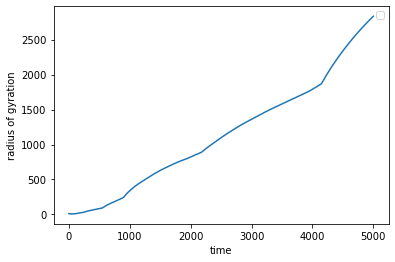

In [5]:
# Calculation of gyration radius of trajectories 

import numpy as np
import seaborn

# Calculate centre of masses for X_tr and Y_tr 
# First we split them into pairs (X_tr1, Y_tr1), ... 
Tr_array = np.zeros((2,np.size(X_tr)))
print(np.size(X_tr))

for i in range(0,np.size(X_tr)):
    Tr_array[0,i] = X_tr[i]
    Tr_array[1,i] = Y_tr[i]


nonZeroMasses = Tr_array[np.nonzero(Tr_array[:,2])] # Not really necessary, can just use masses because 0 mass used as weight will work just fine.
CM = np.average(nonZeroMasses[:,:2], axis=0, weights=nonZeroMasses[:,2])
print('centre of masses', CM)

# Now we make summation through trajectory elements 

rad_gyr = 0
for i in range(0, np.size(X_tr)):
    rad_gyr = rad_gyr + (X_tr[i] - CM[0])*(X_tr[i] - CM[0]) + (Y_tr[i] - CM[1])*(Y_tr[i] - CM[1])
rad_gyr = np.sqrt(rad_gyr*1./np.size(X_tr))
print('radius gyration', rad_gyr)


# Now we make summation through trajectory elements in Time

rad_gyr = np.zeros(np.size(X_tr))
sum_gyr = 0
#rad_gyr[0] = (X_tr[0] - CM[0])*(X_tr[0] - CM[0]) + (Y_tr[0] - CM[1])*(Y_tr[0] - CM[1])
for i in range(0, np.size(X_tr)):
    sum_gyr = sum_gyr + (X_tr[i] - CM[0])*(X_tr[i] - CM[0]) + (Y_tr[i] - CM[1])*(Y_tr[i] - CM[1])
    rad_gyr[i] = np.sqrt(sum_gyr*1./i)
print('radius gyration', rad_gyr)

plt.plot(rad_gyr) # % tuple(popt))


plt.xlabel('time')
plt.ylabel('radius of gyration')
plt.legend()
plt.show()




### Fitting curves 
Plot of curves and their fit.

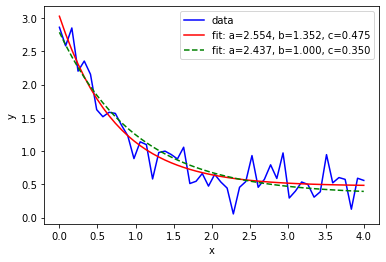

In [3]:

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

#Example data
#Define the data to be fit with some noise:

xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

#Fit for the parameters a, b, c of the function func:


popt, pcov = curve_fit(func, xdata, ydata)
popt

plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

#Constrain the optimization to the region of 0 <= a <= 3, 0 <= b <= 1 and 0 <= c <= 0.5:

popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
popt

plt.plot(xdata, func(xdata, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))


plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



          t  x  y
0  0.000000  0  1
1  0.020004 -1  1
2  0.040008  0  0
3  0.060012  0  1
4  0.080016  0  1
     msds       tau  msds_std
0  0.0000  0.000000  0.000000
1  1.3576  0.020004  0.664688
2  2.7138  0.040008  2.149887
3  4.0534  0.060012  3.555204
4  5.3374  0.080016  4.885564


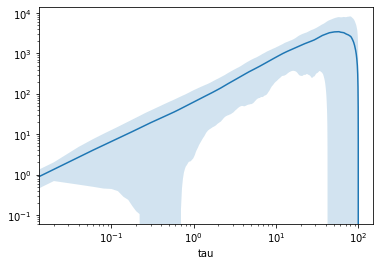

In [6]:
import pandas as pd

def compute_msd(trajectory, t_step, coords=['x', 'y']):
    
    '''
    Computes MSD for trajectories X(t),Y(t). 
    Trajectories are from dataframe.
    '''

    tau = trajectory['t'].copy()
    shifts = np.floor(tau / t_step).astype(np.int)
    msds = np.zeros(shifts.size)
    msds_std = np.zeros(shifts.size)

    for i, shift in enumerate(shifts):
        diffs = trajectory[coords] - trajectory[coords].shift(-shift)
        sqdist = np.square(diffs).sum(axis=1)
        msds[i] = sqdist.mean()
        msds_std[i] = sqdist.std()

    msds = pd.DataFrame({'msds': msds, 'tau': tau, 'msds_std': msds_std})
    return msds

# Load trajectories 



# Parameters
N = 5000
max_time = 100
dt = max_time / N

t = np.linspace(0, max_time, N)
xy = np.cumsum(np.random.choice([-1, 0, 1], size=(N, 2)), axis=0)
traj = pd.DataFrame({'t': t, 'x': xy[:,0], 'y': xy[:,1]})
print(traj.head())

#load trajectories
#traj = list(zip(X_tr, Y_tr))
#dt = n

# Compute MSD
msd = compute_msd(traj, t_step=dt, coords=['x', 'y'])
print(msd.head())

# Plot MSD
ax = msd.plot(x="tau", y="msds", logx=True, logy=True, legend=False)
ax.fill_between(msd['tau'], msd['msds'] - msd['msds_std'], msd['msds'] + msd['msds_std'], alpha=0.2)